In [1]:
%pip install --user kaggle 
%pip install --user pandas
%pip install --user scikit-learn
%pip install --user matplotlib
%pip install --user geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
!kaggle datasets download -d uciml/forest-cover-type-dataset


  0%|          | 0.00/11.2M [00:00<?, ?B/s]
  9%|8         | 1.00M/11.2M [00:00<00:06, 1.56MB/s]
 18%|#7        | 2.00M/11.2M [00:00<00:03, 3.10MB/s]
 36%|###5      | 4.00M/11.2M [00:00<00:01, 6.25MB/s]
 54%|#####3    | 6.00M/11.2M [00:01<00:00, 9.19MB/s]
 81%|########  | 9.00M/11.2M [00:01<00:00, 13.0MB/s]
100%|##########| 11.2M/11.2M [00:01<00:00, 9.30MB/s]


In [5]:
!unzip -o forest-cover-type-dataset.zip 

Archive:  forest-cover-type-dataset.zip
  inflating: covtype.csv             


<h4>Zbiór</h4>

In [30]:
data = pd.read_csv("covtype.csv")
data = data.sample(frac = 1)
data.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
318054       2517     271     12                               272   
30504        2959       0      1                               180   
349520       3093      54     19                                42   
365645       2502     330     17                               150   
131114       2962       4     13                                95   
385769       3181     119      5                               170   
161626       2950     270      4                               108   
394880       3051     155     22                               390   
389492       3024     191     16                               785   
52507        2714     349     18                                67   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
318054                              84                              484   
30504                               20                             5960   
349520                              -3                              797   
365645                              52                              738   
131114                               7                             4270   
385769                              -1                             2416   
161626                              15                             2053   
394880                              70                             1871   
389492                             110                             3000   
52507                               20                             1599   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
318054            189             244            193   
30504             217             236            156   
349520            227             196             94   
365645            177             216            178   
131114            202             214            148   
385769            228             235            141   
161626            210             241            170   
394880            239             236            114   
389492            218             251            162   
52507             184             207            160   

        Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
318054                                 162  ...            0            0   
30504                                 3960  ...            0            0   
349520                                1318  ...            0            0   
365645                                 510  ...            0            0   
131114                                1999  ...            0            0   
385769                                 999  ...            0            0   
161626                                2037  ...            0            0   
394880                                1510  ...            0            0   
389492                                1961  ...            0            1   
52507                                 3234  ...            0            0   

        Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
318054            0            0            0            0            0   
30504             0            0            0            0            0   
349520            0            0            0            0            0   
365645            0            0            0            0            0   
131114            0            0            0            0            0   
385769            0            0            0            0            0   
161626            0            0            0            0            0   
394880            0            0            0            0            0   
389492            0            0            0            0            0   
52507             0            0            0            0            0   

        Soil_Type39  Soil_Type40  Cover_Type  
318054            0            0           2  
30504             0       

Podział na podzbiory

In [4]:
from sklearn.model_selection import train_test_split
forest_train, forest_test = train_test_split(data, test_size=0.2, random_state=1)
forest_train, forest_val = train_test_split(forest_train, test_size=0.25, random_state=1)

<h4>Statystyki</h4>

Wielkości zbiorów

In [5]:
print(f'wielkość zbioru: {data.shape}')
print(f'wielkość zbioru treningowego: {forest_train.shape}')
print(f'wielkość zbioru testującego: {forest_test.shape}')
print(f'wielkość zbioru walidacyjnego: {forest_val.shape}')

wielkość zbioru: (581012, 55)
wielkość zbioru treningowego: (348606, 55)
wielkość zbioru testującego: (116203, 55)
wielkość zbioru walidacyjnego: (116203, 55)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Nachylenie



In [10]:
print(f'Średnie nachylenie: {data["Slope"].mean()}')
print(f'Maksymalne nachylenie: {data["Slope"].max()}')
print(f'Minimalne nachylenie: {data["Slope"].min()}')

Średnie nachylenie: 14.103703537964792
Maksymalne nachylenie: 66
Minimalne nachylenie: 0


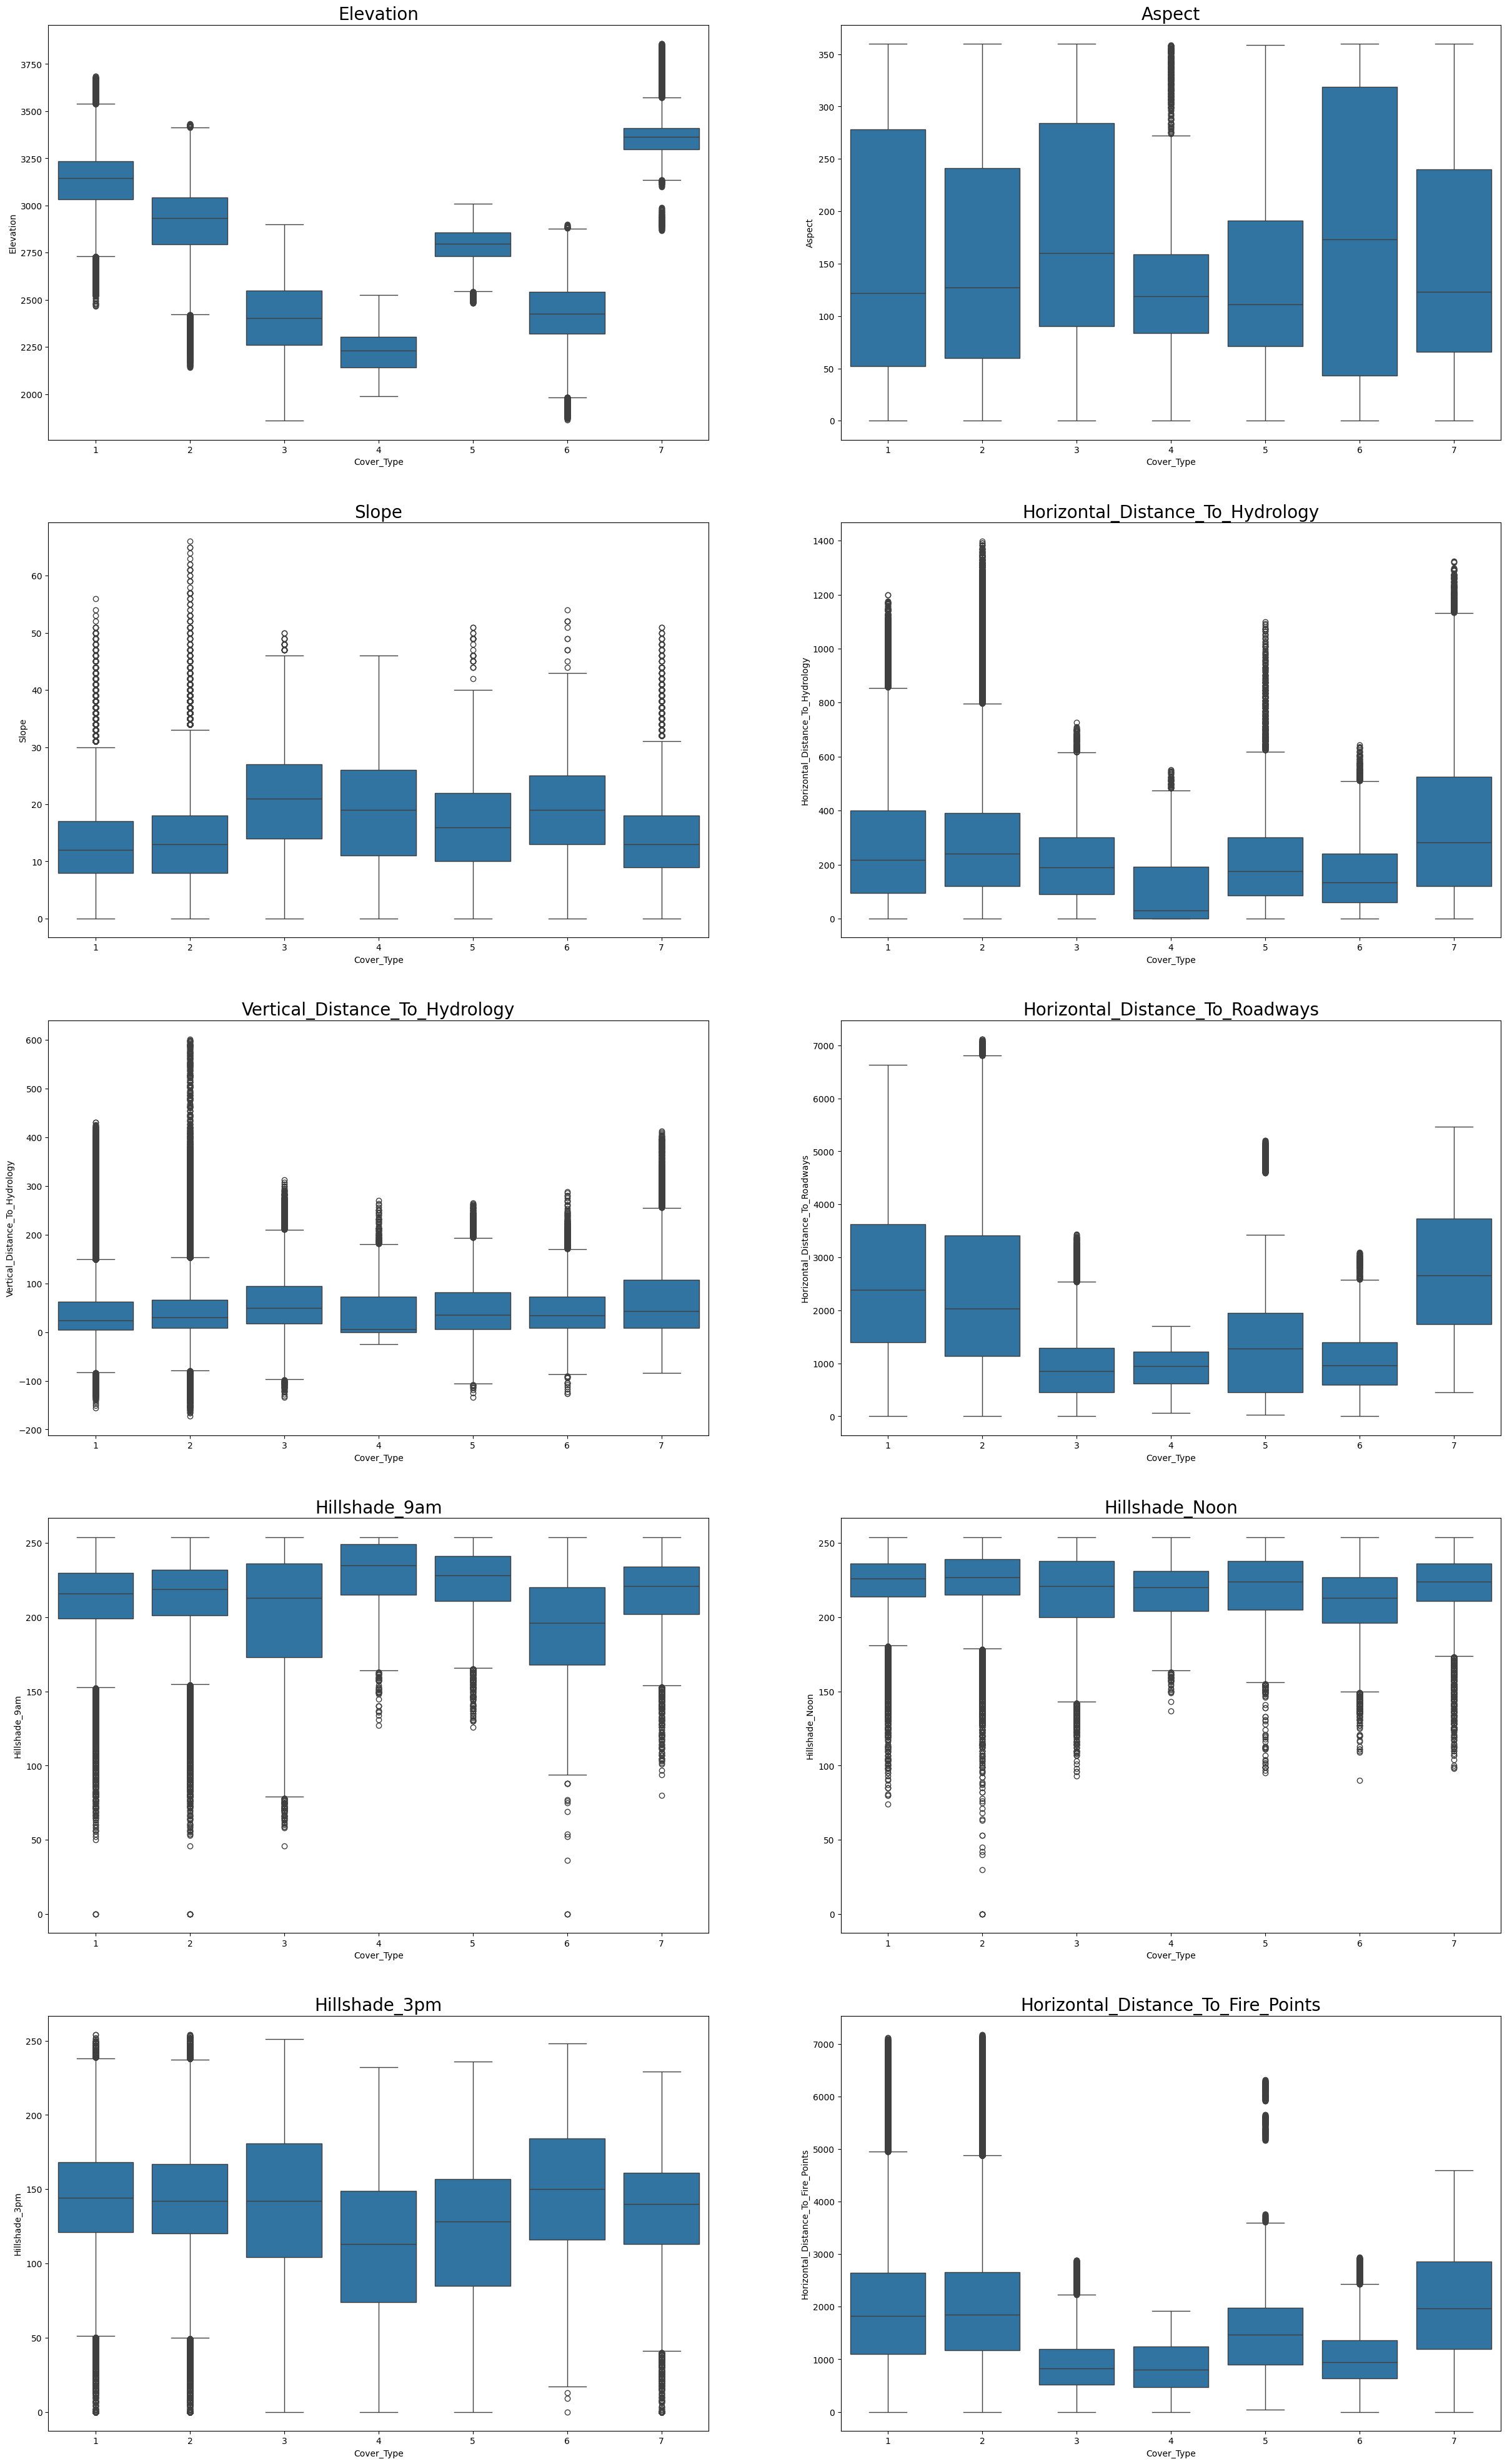

In [12]:
import seaborn as sns
features = data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

plt.figure(figsize=(30, 50))
for i,col in enumerate(features.columns.values):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=data['Cover_Type'], y=col, data=data)
    plt.title(col, fontsize=20)
    
plt.show()

Normalizacja

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_normalize = data.columns[~data.columns.str.startswith('Soil_Type')]
columns_to_normalize = columns_to_normalize.to_list()
columns_to_normalize.remove('Cover_Type')
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

data.head(10)

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
318054  -1.579964  1.030645 -0.280934                          0.012100   
30504   -0.001305 -1.390866 -1.749905                         -0.420741   
349520   0.477293 -0.908351  0.653865                         -1.070003   
365645  -1.633538  1.557837  0.386780                         -0.561885   
131114   0.009410 -1.355124 -0.147392                         -0.820649   
385769   0.791596 -0.327546 -1.215734                         -0.467789   
161626  -0.033449  1.021709 -1.349277                         -0.759486   
394880   0.327285 -0.005869  1.054494                          0.567265   
389492   0.230851  0.315808  0.253237                          2.425659   
52507   -0.876353  1.727611  0.520322                         -0.952383   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
318054                        0.644670                        -1.196821   
30504                        -0.453191                         2.315116   
349520                       -0.847735                        -0.996083   
365645                        0.095739                        -1.033922   
131114                       -0.676194                         1.231264   
385769                       -0.813427                         0.042234   
161626                       -0.538961                        -0.190570   
394880                        0.404513                        -0.307292   
389492                        1.090676                         0.416772   
52507                        -0.453191                        -0.481735   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
318054      -0.864631        1.046164       1.318678   
30504        0.181321        0.641484       0.351977   
349520       0.554876       -1.381919      -1.267901   
365645      -1.312896       -0.370218       0.926772   
131114      -0.379010       -0.471388       0.142960   
385769       0.592231        0.590899      -0.039929   
161626      -0.080167        0.894409       0.717756   
394880       1.003141        0.641484      -0.745360   
389492       0.218677        1.400260       0.508739   
52507       -1.051408       -0.825483       0.456485   

        Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
318054                           -1.373130  ...            0            0   
30504                             1.495029  ...            0            0   
349520                           -0.500147  ...            0            0   
365645                           -1.110329  ...            0            0   
131114                            0.014128  ...            0            0   
385769                           -0.741048  ...            0            0   
161626                            0.042825  ...            0            0   
394880                           -0.355153  ...            0            0   
389492                           -0.014568  ...            0            1   
52507                             0.946771  ...            0            0   

        Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
318054            0            0            0            0            0   
30504             0            0            0            0            0   
349520            0            0            0            0            0   
365645            0            0            0            0            0   
131114            0            0            0            0            0   
385769            0            0            0            0            0   
161626            0            0            0            0            0   
394880            0            0            0            0            0   
389492            0            0            0            0            0   
52507             0            0            0            0            0   

        Soil_Type39  Soil_Type40  Cover_Type  
318054            